# Welcome to Week 3
## Linear Regression

Simple linear regression is a basic ML model.  
You must be aware about the equation of line **y=mx+c**.  
This function tries to make best fit line for our dataset.   
Dataset is available [here](https://www.kaggle.com/andonians/random-linear-regression)  
We recommend you to go through [this](https://www.youtube.com/watch?v=GhrxgbQnEEU) or [this](https://www.youtube.com/watch?v=E5RjzSK0fvY) video to understand the intuition.

In [1]:
import pandas as pd
data=pd.read_csv('data/x-y.csv')
data = data.dropna(how='any',axis=0)[:100]

In [2]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


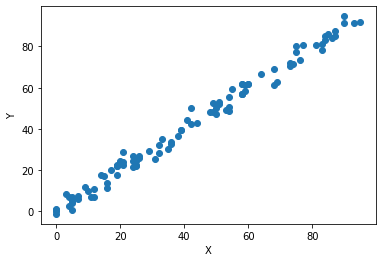

In [3]:
import matplotlib.pyplot as plt

plt.scatter(data["x"],data["y"])
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

As observed the dataset is linear.  

In [4]:
x=data['x'].values.reshape(-1,1)
y=data['y'].values.reshape(-1,1)

### Spliting the Data
It is necessary to have a dataset to train and one dataset to test.  
But these two must be of same origin to prevent error.   
For example if predicting presence of function from a webcam, you cannot expect to attain good results while testing for CCTV footage.  

So if test data is not given explicitly make your own by spilting the data for small data we can split the ratio of about **train***: 0.8 **test 0.2**

For larger dataset we can split in the ratio of **train**: 0.01 **test 0.99**  

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

## [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression)

This class makes a best fit line for **Y = M*X + X** .  
Let's understand it's working.

* It choses random variable m and c.  
* Calculate y prediction using these random variable.  
* Calculater error (root mean square).
* Update variables to get least error using stats formula.

In [6]:
from sklearn.linear_model import LinearRegression
r1=LinearRegression()
# This is an object which stores value of slope and intercept
r1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
r1.intercept_

array([0.54038651])

In [8]:
r1.coef_

array([[0.98590331]])

In [9]:
y_pred = r1.predict(X_test)

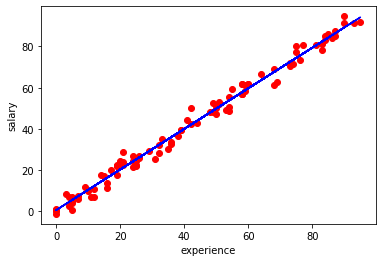

In [10]:
#visualising
plt.scatter(x,y,color='red')
plt.plot(X_train, r1.predict(X_train),color='blue')
plt.ylabel('salary')
plt.xlabel('experience')
plt.show()

In [11]:
import numpy as np
p=np.asarray([100]).reshape(-1,1)
r1.predict(p)

array([[99.13071774]])

## Multilinear Regression

This model was very peculiar to two axis only. Let's add some more variables.  
Now our equation will be **y = b0 + b1x1 + b2x2 +b3x3 ...**  
Here Sklearn provides us flexibility, as we can again use the same class. Let's try it out.  
The dataset is available [here](https://www.kaggle.com/quantbruce/real-estate-price-prediction).

In [12]:
dataset = pd.read_csv('data/Realestate.csv')
dataset.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [13]:
y = dataset["Y house price of unit area"].values.reshape(-1,1)
x = dataset.drop(["No","Y house price of unit area","X1 transaction date"],axis=1)

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=0)

In [15]:
"""
We need to apply scaling due to the values. Here we've apllied Standard Scaler but you shoul check out more.  
Also the same scalar function must be applied to both training and testing data.
"""
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [16]:
from sklearn.linear_model import LinearRegression
l1=LinearRegression()
l1.fit(x_train,y_train)
y_pred=l1.predict(x_test)

In [17]:
y_pred[:5]

array([[41.39074736],
       [12.35535341],
       [41.10500538],
       [12.16895621],
       [40.36129482]])

In [18]:
y_test[:5]

array([[45.3],
       [14.4],
       [46. ],
       [15.6],
       [50.2]])

the values are pretty close. Let's find our error.  
We've multiple mathods for determining error, and you should check [this](https://www.dataquest.io/blog/understanding-regression-error-metrics/) to learn about tyoes of regression errors and when to use them.

We'll be using mean squared error from [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

In [19]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test,y_pred)

62.172235622414036

## Dummy variable tray  
Last week we learned about One Hot Encoding our data, to give equal weighatge to different classes, but we face a problem here!!

Lets consider **y = b0 + b1x1 + b2x2 +b3x3**  

Where x2 and x3 are dummy variables, i.e. if x2 = 1 ,x3 = 0  
So x3 = 1-x2  
Applying in our equation  

y = b0 + b1x1 + b2x2 +b3(1-x2)  
or
y = b0 + b3 + b1x1 + x2 (b2-b3)

So variable b3 is being added to constant tot create a new constant and subtracting from b2 affects our coeffecient.  Hence, the equation of line changes attributing to an increase in loss.  

This is dummy variable trap, and only way to setlle is to remove one variable, while creating it

Check out more [here](https://www.youtube.com/watch?v=qrWx3OjZL3o)

## Backword elimination
This is a method of removing columns with small or not effect on our result.   
This makes our model faster and also in some cases Robust.  
Refer [this](https://medium.com/@manjabogicevic/multiple-linear-regression-using-python-b99754591ac0) to learn more. 

# Polynomial regression

Not all variables are linearly dependent on target variables.
Let's consider a dataset of your position in a company and your Salary.
A sample dataset is present [here](https://www.kaggle.com/testpython/polynomial-position-salary-data)

Equation of a degree 2 polynomial equation looks like this  
**y = ax^2 + bx + c**  

A Degree 3 euation is like this    
**y = ax^3 + bx^2 + cx + d**

In [20]:
data = pd.read_csv('data/Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [21]:
x=data.iloc[:,1:2].values
y=data.iloc[:,-1].values

There's no Polynomail regression method in Scikit Learn, but we can convert our dataset to polynomial features and them implement Linear Regression.  
Check out more at **[Polynomial Features](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)**

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

p1= PolynomialFeatures(degree=2)        # lets start with degree 2
x_poly=p1.fit_transform(x)
l2=LinearRegression()
l2.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

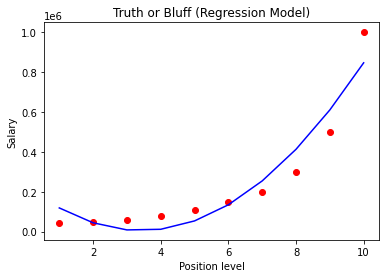

In [23]:
plt.scatter(x, y, color = 'red')
plt.plot(x, l2.predict(p1.fit_transform(x)), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

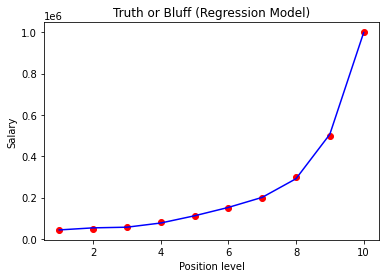

In [24]:
p1= PolynomialFeatures(degree=5)        # lets start with degree 5
x_poly=p1.fit_transform(x)
l2=LinearRegression()
l2.fit(x_poly,y)

plt.scatter(x, y, color = 'red')
plt.plot(x, l2.predict(p1.fit_transform(x)), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

That's all for this week.   
Do refer the link and practice out on Kaggle.  
You can also refer here for more regression models.  
- [Super Data Science](https://www.superdatascience.com/pages/machine-learning)
- [Scikit-Learn](https://scikit-learn.org/stable/index.html)
- [YouTube](https://www.youtube.com/watch?v=E5RjzSK0fvY)